In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import cross_val_score

In [5]:
df=pd.read_csv('/content/IMDb_Movies_India[1].csv',encoding='latin1')
df.head(10)

Name    Year Duration  \
0                                         NaN      NaN   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                         #Homecoming  (2021)   90 min   
3                             #Yaaram  (2019)  110 min   
4                   ...And Once Again  (2010)  105 min   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                           ...Yahaan  (2005)  142 min   
7                      .in for Motion  (2008)   59 min   
8                  ?: A Question Mark  (2012)   82 min   
9                            @Andheri  (2014)  116 min   

                       Genre  Rating  Votes            Director  \
0                      Drama     NaN    NaN       J.S. Randhawa   
1                      Drama     7.0      8       Gaurav Bakshi   
2             Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3            Comedy, Romance     4.4     35          Ovais Khan   
4                      Drama     NaN    NaN        Amol Palekar   
5     Comedy, Drama, Musical     4.7    827        Rahul Rawail   
6        Drama, Romance, War     7.4  1,086      Shoojit Sircar   
7                Documentary     NaN    NaN       Anirban Datta   
8  Horror, Mystery, Thriller     5.6    326       Allyson Patel   
9    Action, Crime, Thriller     4.0     11   Biju Bhaskar Nair   

           Actor 1                 Actor 2          Actor 3  
0         Manmauji                  Birbal  Rajendra Bhatia  
1     Rasika Dugal          Vivek Ghamande    Arvind Jangid  
2     Sayani Gupta       Plabita Borthakur       Roy Angana  
3          Prateik              Ishita Raj  Siddhant Kapoor  
4     Rajat Kapoor      Rituparna Sengupta      Antara Mali  
5       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
7              NaN                     NaN              NaN  
8        Yash Dave          Muntazir Ahmad     Kiran Bhatia  
9        Augustine            Fathima Babu             Byon

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
df.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [9]:
print("unique count")
print(df.nunique())
print("Null count")
df.isnull().sum()

unique count
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64
Null count


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(df)
result

Missing Values Percentage
Name                   0       0.0%
Year                 528       3.4%
Duration            8269     53.32%
Genre               1877      12.1%
Rating              7590     48.94%
Votes               7589     48.93%
Director             525      3.39%
Actor 1             1617     10.43%
Actor 2             2384     15.37%
Actor 3             3144     20.27%

In [ ]:
sns.heatmap(df.isnull())

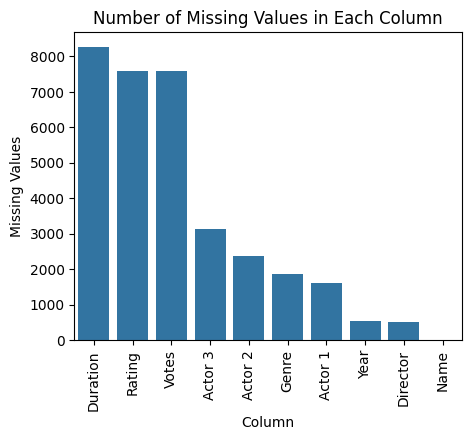

In [11]:
missing_values = df.isnull().sum()

missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

missing_values_df = missing_values_df.sort_values(by='Missing Values', ascending=False)
plt.figure(figsize=(5, 4))
sns.barplot(x='Column', y='Missing Values', data=missing_values_df)
plt.xticks(rotation=90)
plt.title('Number of Missing Values in Each Column')
plt.show()

In [12]:
df['Rating'].fillna(df['Rating'].mean())

0        5.841621
1        7.000000
2        5.841621
3        4.400000
4        5.841621
           ...   
15504    4.600000
15505    4.500000
15506    5.841621
15507    5.841621
15508    6.200000
Name: Rating, Length: 15509, dtype: float64

In [13]:
result = missing_values_percent(df)
result

Missing Values Percentage
Name                   0       0.0%
Year                 528       3.4%
Duration            8269     53.32%
Genre               1877      12.1%
Rating              7590     48.94%
Votes               7589     48.93%
Director             525      3.39%
Actor 1             1617     10.43%
Actor 2             2384     15.37%
Actor 3             3144     20.27%

In [14]:
df['Duration'] = df['Duration'].fillna('0').astype(str)
df['Duration'] = df['Duration'].str.replace(' min', '')
df['Duration'] = df['Duration'].astype(int)

In [15]:
print(max(df['Duration']))
print(min(df['Duration']))
print(np.mean(df['Duration']))
print(max(df['Duration']))

321
0
59.81275388484106
321


<Axes: xlabel='Duration'>

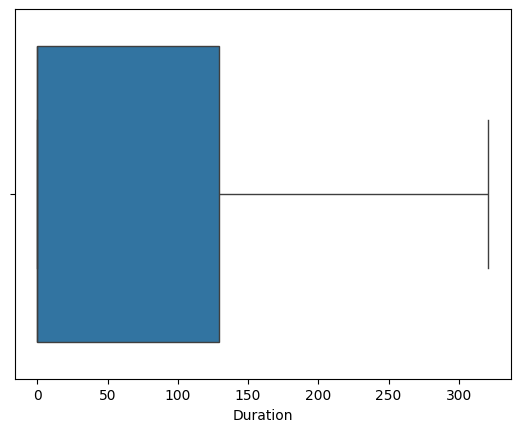

In [16]:
df['Duration']=df['Duration'].astype(int)
sns.boxplot(x=df['Duration'])

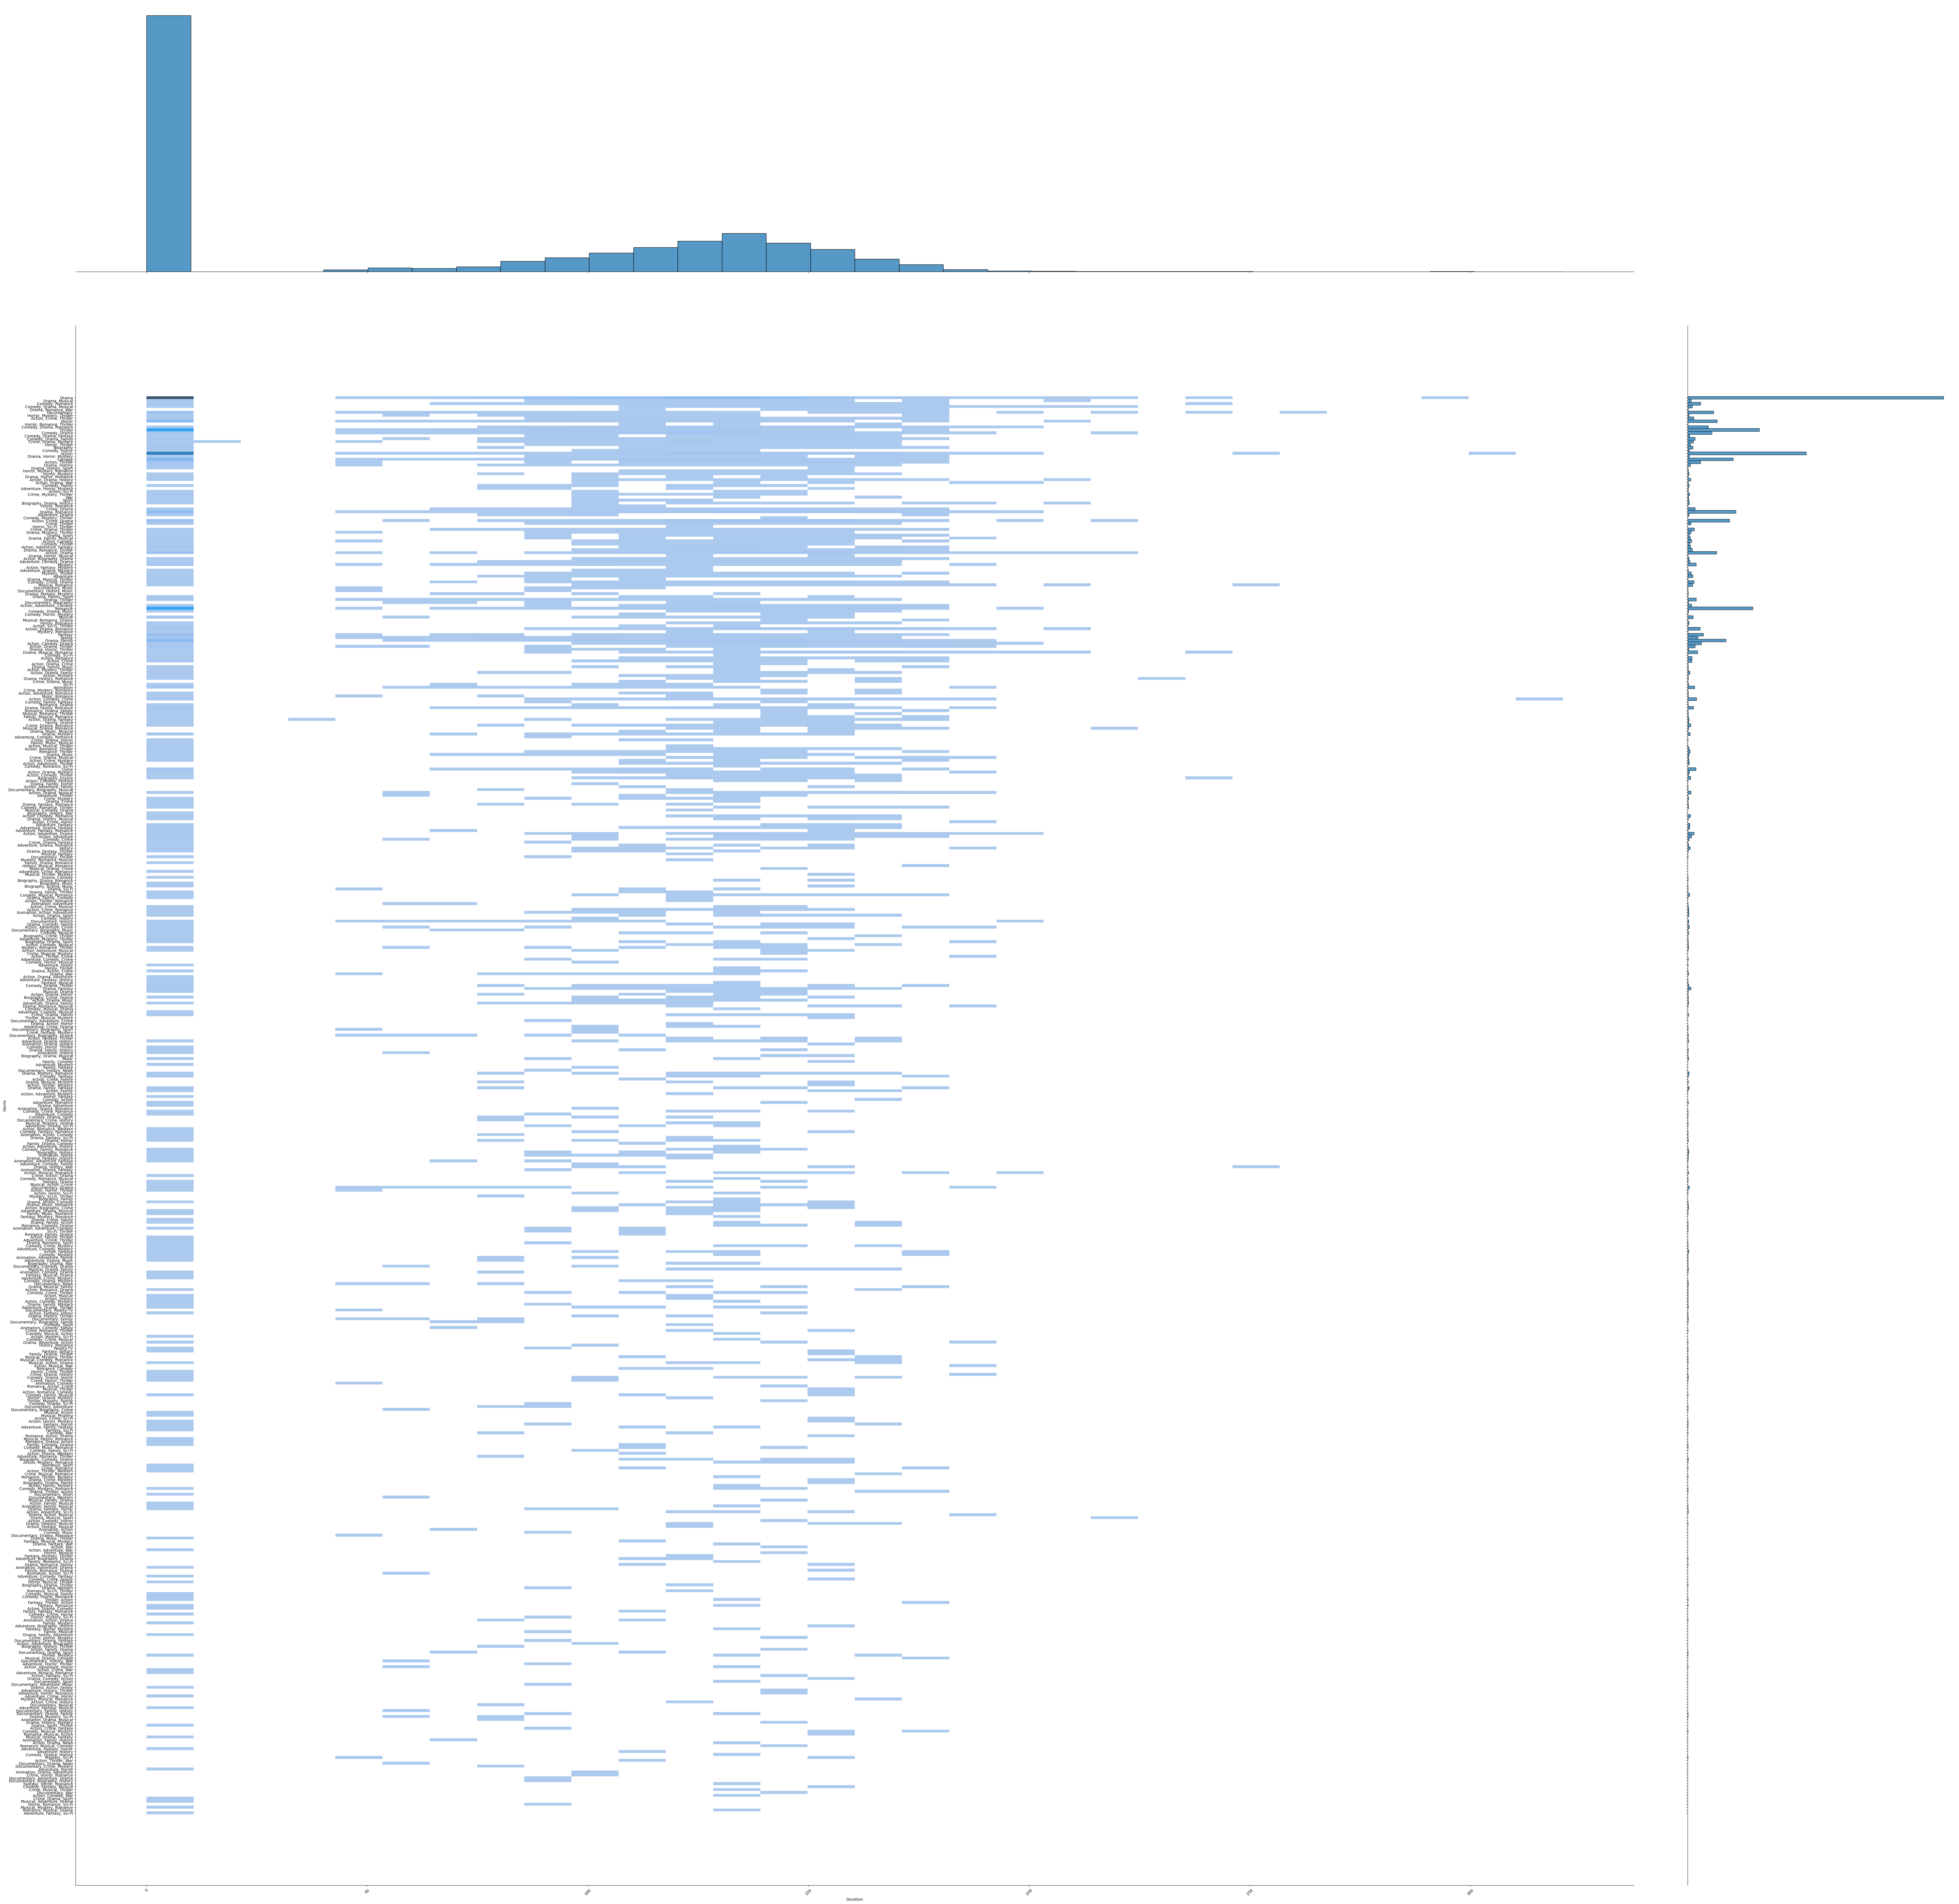

In [17]:
sns.jointplot(data=df, y='Genre', x='Duration',height=69,dropna=True,kind='hist')
plt.xticks(rotation=45)
plt.show()

In [18]:
median_duration_by_genre = df.groupby('Genre')['Duration'].median()
print("\nMedian duration by genre:")
print(median_duration_by_genre)
print("\nRows with Duration == 0 before replacement:")
print(df[df['Duration'] == 0])
for genre, median_duration in median_duration_by_genre.items():
    df.loc[(df['Duration'] == 0) & (df['Genre'] == genre), 'Duration'] = median_duration

print("\nRows with Duration == 0 after replacement:")
print(df['Duration'].value_counts())


Median duration by genre:
Genre
Action                            0.0
Action, Adventure                 0.0
Action, Adventure, Biography    100.0
Action, Adventure, Comedy       140.0
Action, Adventure, Crime         93.0
                                ...  
Thriller, Action                 64.5
Thriller, Musical, Mystery      158.0
Thriller, Mystery               139.0
Thriller, Mystery, Family       142.0
War                              50.0
Name: Duration, Length: 485, dtype: float64

Rows with Duration == 0 before replacement:
                      Name    Year  Duration                   Genre  Rating  \
0                              NaN         0                   Drama     NaN   
14              101 Ratein  (1990)         0                Thriller     NaN   
16             108 Limited     NaN         0                     NaN     NaN   
17         108 Teerthyatra  (1987)         0  Comedy, Drama, Fantasy     NaN   
19              11 O'Clock  (1948)         0                

In [19]:
median_duration_by_director = df.groupby('Director')['Duration'].median()

for director, median_duration in median_duration_by_director.items():
    df.loc[(df['Duration'] == 0) & (df['Director'] == director), 'Duration'] = median_duration

print("\nCount of each Duration value:")
print(df['Duration'].value_counts())


Count of each Duration value:
Duration
0.0      5452
120.0     520
135.0     356
133.0     253
130.0     213
         ... 
107.5       1
2.0         1
84.5        1
85.5        1
29.0        1
Name: count, Length: 305, dtype: int64


In [20]:
actors=['Actor 1','Actor 2',  'Actor 3']
for actor in actors:
    median_duration_by_actor = df.groupby(actor)['Duration'].median()

    for act, median_duration in median_duration_by_actor.items():
        df.loc[(df['Duration'] == 0) & (df[actor] == act), 'Duration'] = median_duration
    print(f"\nCount of each Duration value: when grouping by {actor}")
    print(df['Duration'].value_counts())


Count of each Duration value: when grouping by Actor 1
Duration
0.00      4287
120.00     556
135.00     388
133.00     313
130.00     229
          ... 
77.25        1
73.75        1
33.75        1
83.50        1
135.75       1
Name: count, Length: 355, dtype: int64

Count of each Duration value: when grouping by Actor 2
Duration
0.00      3272
120.00     611
135.00     405
133.00     320
130.00     234
          ... 
206.00       1
89.75        1
19.25        1
33.50        1
106.25       1
Name: count, Length: 408, dtype: int64

Count of each Duration value: when grouping by Actor 3
Duration
0.00      2601
120.00     661
135.00     409
133.00     329
130.00     237
          ... 
223.00       1
13.75        1
93.25        1
55.25        1
106.25       1
Name: count, Length: 450, dtype: int64


321


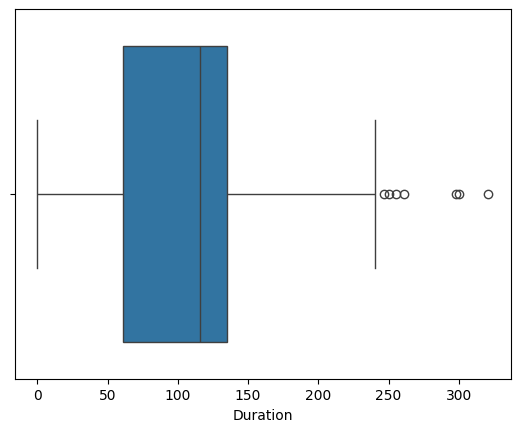

In [21]:
df['Duration']=df['Duration'].astype(int)
sns.boxplot(x=df['Duration'])
print(max(df['Duration']))

In [22]:
df=df.dropna(subset=['Duration'],axis=0)
df=df[df['Duration'] >= 60]
df.head()

Name    Year  Duration            Genre  \
0                                         NaN        66            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)       109            Drama   
2                         #Homecoming  (2021)        90   Drama, Musical   
3                             #Yaaram  (2019)       110  Comedy, Romance   
4                   ...And Once Again  (2010)       105            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

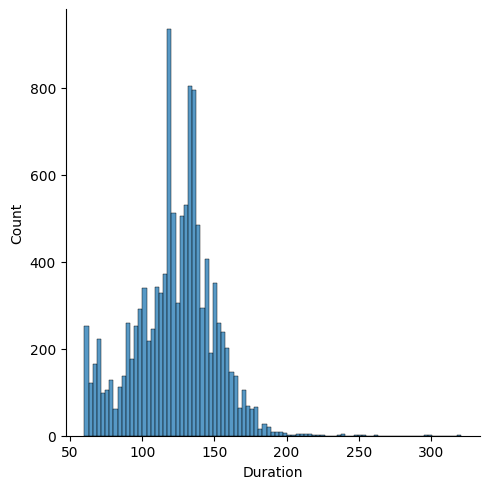

In [23]:
sns.displot(df['Duration'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11817 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11817 non-null  object 
 1   Year      11465 non-null  object 
 2   Duration  11817 non-null  int64  
 3   Genre     11017 non-null  object 
 4   Rating    7594 non-null   float64
 5   Votes     7595 non-null   object 
 6   Director  11800 non-null  object 
 7   Actor 1   11462 non-null  object 
 8   Actor 2   11207 non-null  object 
 9   Actor 3   10840 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1015.5+ KB


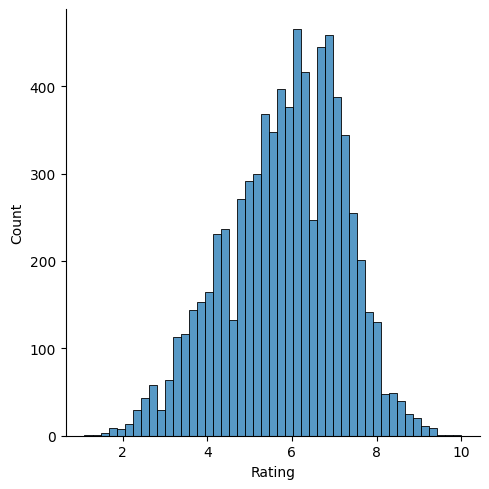

In [25]:
sns.displot(df['Rating'])

In [26]:
df=df.dropna(subset=['Rating'],axis=0)
result = missing_values_percent(df)
result

Missing Values Percentage
Name                   0       0.0%
Year                   0       0.0%
Duration               0       0.0%
Genre                 65      0.86%
Rating                 0       0.0%
Votes                  0       0.0%
Director               1      0.01%
Actor 1               76       1.0%
Actor 2              123      1.62%
Actor 3              189      2.49%

In [27]:
df["Director"]=df["Director"].fillna('Dilip Bose')

result = missing_values_percent(df)
result

Missing Values Percentage
Name                   0       0.0%
Year                   0       0.0%
Duration               0       0.0%
Genre                 65      0.86%
Rating                 0       0.0%
Votes                  0       0.0%
Director               0       0.0%
Actor 1               76       1.0%
Actor 2              123      1.62%
Actor 3              189      2.49%

In [28]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)
df.head()

Name    Year  Duration    Genre  Rating  \
1  #Gadhvi (He thought he was Gandhi)  (2019)       109    Drama     7.0   
3                             #Yaaram  (2019)       110   Comedy     4.4   
3                             #Yaaram  (2019)       110  Romance     4.4   
5                ...Aur Pyaar Ho Gaya  (1997)       147   Comedy     4.7   
5                ...Aur Pyaar Ho Gaya  (1997)       147    Drama     4.7   

  Votes       Director       Actor 1                 Actor 2          Actor 3  
1     8  Gaurav Bakshi  Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3    35     Ovais Khan       Prateik              Ishita Raj  Siddhant Kapoor  
3    35     Ovais Khan       Prateik              Ishita Raj  Siddhant Kapoor  
5   827   Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
5   827   Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor

In [29]:
df=df.dropna(subset=['Actor 1','Actor 2','Actor 3'],axis=0)
result = missing_values_percent(df)
result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15152 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15152 non-null  object 
 1   Year      15152 non-null  object 
 2   Duration  15152 non-null  int64  
 3   Genre     15152 non-null  object 
 4   Rating    15152 non-null  float64
 5   Votes     15152 non-null  object 
 6   Director  15152 non-null  object 
 7   Actor 1   15152 non-null  object 
 8   Actor 2   15152 non-null  object 
 9   Actor 3   15152 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [30]:
df['Votes'] = df['Votes'].str.replace(',', '', regex=False).astype(int)

In [31]:
df.head(10)

Name    Year  Duration    Genre  Rating  \
1  #Gadhvi (He thought he was Gandhi)  (2019)       109    Drama     7.0   
3                             #Yaaram  (2019)       110   Comedy     4.4   
3                             #Yaaram  (2019)       110  Romance     4.4   
5                ...Aur Pyaar Ho Gaya  (1997)       147   Comedy     4.7   
5                ...Aur Pyaar Ho Gaya  (1997)       147    Drama     4.7   
5                ...Aur Pyaar Ho Gaya  (1997)       147  Musical     4.7   
6                           ...Yahaan  (2005)       142    Drama     7.4   
6                           ...Yahaan  (2005)       142  Romance     7.4   
6                           ...Yahaan  (2005)       142      War     7.4   
8                  ?: A Question Mark  (2012)        82   Horror     5.6   

   Votes        Director          Actor 1                 Actor 2  \
1      8   Gaurav Bakshi     Rasika Dugal          Vivek Ghamande   
3     35      Ovais Khan          Prateik              Ishita Raj   
3     35      Ovais Khan          Prateik              Ishita Raj   
5    827    Rahul Rawail       Bobby Deol  Aishwarya Rai Bachchan   
5    827    Rahul Rawail       Bobby Deol  Aishwarya Rai Bachchan   
5    827    Rahul Rawail       Bobby Deol  Aishwarya Rai Bachchan   
6   1086  Shoojit Sircar  Jimmy Sheirgill          Minissha Lamba   
6   1086  Shoojit Sircar  Jimmy Sheirgill          Minissha Lamba   
6   1086  Shoojit Sircar  Jimmy Sheirgill          Minissha Lamba   
8    326   Allyson Patel        Yash Dave          Muntazir Ahmad   

           Actor 3  
1    Arvind Jangid  
3  Siddhant Kapoor  
3  Siddhant Kapoor  
5    Shammi Kapoor  
5    Shammi Kapoor  
5    Shammi Kapoor  
6   Yashpal Sharma  
6   Yashpal Sharma  
6   Yashpal Sharma  
8     Kiran Bhatia

In [32]:
fig_year = px.histogram(df, x='Year', histnorm='probability density', nbins=30)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(
    title='Distribution of Year',
    title_x=0.5,
    title_pad=dict(t=20),
    title_font=dict(size=20),
    xaxis_title='Year',
    yaxis_title='Probability Density',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    bargap=0.02,
    plot_bgcolor='white'
)

In [33]:
fig_dur = px.histogram(df, x = 'Duration', histnorm='probability density', nbins = 40)
fig_dur.update_traces(selector=dict(type='histogram'))
fig_dur.update_layout(
    title='Distribution of Duration',
    title_x=0.5, title_pad=dict(t=20),
    title_font=dict(size=20), xaxis_title='Duration',
    yaxis_title='Probability Density',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    bargap=0.02,
    plot_bgcolor = 'white')
fig_dur.show()

In [34]:
fig_rat = px.histogram(df, x = 'Rating', histnorm='probability density', nbins = 40)
fig_rat.update_traces(selector=dict(type='histogram'))
fig_rat.update_layout(title='Distribution of Rating',
                      title_x=0.5,
                      title_pad=dict(t=20),
                      title_font=dict(size=20),
                      xaxis_title='Rating',
                      yaxis_title='Probability Density',
                      xaxis=dict(showgrid=False),
                      yaxis=dict(showgrid=False),
                      bargap=0.02,
                      plot_bgcolor = 'white')
fig_rat.show()

In [35]:
fig_vot = px.box(df, x = 'Votes')
fig_vot.update_layout(title='Distribution of Votes',
                        title_x=0.5,
                        title_pad=dict(t=20),
                        title_font=dict(size=20),
                        xaxis_title='Votes',
                        yaxis_title='Probability Density',
                        xaxis=dict(showgrid=False),
                        yaxis=dict(showgrid=False),
                        plot_bgcolor = 'white')
fig_vot.show()

In [36]:
rel_dur_rat = px.scatter(df, x = 'Duration', y = 'Rating', color = "Rating")
rel_dur_rat.update_layout(title='Rating v/s Duration of Movie',
                          title_x=0.5,
                          title_pad=dict(t=20),
                          title_font=dict(size=20),
                          xaxis_title='Duration of Movie in Minutes',
                          yaxis_title='Rating of a movie',
                          xaxis=dict(showgrid=False),
                          yaxis=dict(showgrid=False),
                          plot_bgcolor = 'white')
rel_dur_rat.show()


In [37]:
rel_dur_rat = px.scatter(df, x = 'Actor 1', y = 'Rating', color = "Rating")
rel_dur_rat.update_layout(title='Rating v/s Actor 1',
                          title_x=0.5,
                          title_pad=dict(t=20),
                          title_font=dict(size=20),
                          xaxis_title='Actor 1',
                          yaxis_title='Rating of a movie',
                          xaxis=dict(showgrid=False),
                          yaxis=dict(showgrid=False),
                          plot_bgcolor = 'white')
rel_dur_rat.show()

In [38]:
rel_dur_rat = px.scatter(df, x = 'Actor 2', y = 'Rating', color = "Rating")
rel_dur_rat.update_layout(title='Rating v/s Actor 2',
                          title_x=0.5,
                          title_pad=dict(t=20),
                          title_font=dict(size=20),
                          xaxis_title='Actor 2',
                          yaxis_title='Rating of a movie',
                          xaxis=dict(showgrid=False),
                          yaxis=dict(showgrid=False),
                          plot_bgcolor = 'white')
rel_dur_rat.show()

In [39]:
rel_dur_rat = px.scatter(df, x = 'Actor 3', y = 'Rating', color = "Rating")
rel_dur_rat.update_layout(title='Rating v/s Actor 3',
                          title_x=0.5,
                          title_pad=dict(t=20),
                          title_font=dict(size=20),
                          xaxis_title='Actor 3',
                          yaxis_title='Rating of a movie',
                          xaxis=dict(showgrid=False),
                          yaxis=dict(showgrid=False),
                          plot_bgcolor = 'white')
rel_dur_rat.show()

In [40]:
fig_rat_votes = px.scatter(df, x = 'Rating', y = 'Votes', color = "Votes")
fig_rat_votes.update_layout(title='Getting Look at  Ratings impact on Votes ',
                            title_x=0.5,
                            title_pad=dict(t=20),
                            title_font=dict(size=20),
                            xaxis_title='Ratings of Movies',
                            yaxis_title='Votes of movies',
                            xaxis=dict(showgrid=False),
                            yaxis=dict(showgrid=False),
                            plot_bgcolor = 'white')
fig_rat_votes.show()

In [41]:
df.drop('Name', axis = 1, inplace = True)

In [42]:
g_mean_rat = df.groupby('Genre')['Rating'].transform('mean')
df['G_mean_rat'] = g_mean_rat

dir_mean_rat = df.groupby('Director')['Rating'].transform('mean')
df['Dir_enc'] = dir_mean_rat

a1_mean_rat = df.groupby('Actor 1')['Rating'].transform('mean')
df['A1_enc'] = a1_mean_rat

a2_mean_rat = df.groupby('Actor 2')['Rating'].transform('mean')
df['A2_enc'] = a2_mean_rat

a3_mean_rat = df.groupby('Actor 3')['Rating'].transform('mean')
df['A3_enc'] = a3_mean_rat

<bound method DataFrame.isnull of        Year  Duration    Genre  Rating  Votes       Director  \
1       NaN       109    Drama     7.0      8  Gaurav Bakshi   
3       NaN       110   Comedy     4.4     35     Ovais Khan   
3       NaN       110  Romance     4.4     35     Ovais Khan   
5       NaN       147   Comedy     4.7    827   Rahul Rawail   
5       NaN       147    Drama     4.7    827   Rahul Rawail   
...     ...       ...      ...     ...    ...            ...   
15504   NaN       131   Action     4.6     11  Mahendra Shah   
15505   NaN       129   Action     4.5    655     Kuku Kohli   
15505   NaN       129    Drama     4.5    655     Kuku Kohli   
15508   NaN       130   Action     6.2     20   K.C. Bokadia   
15508   NaN       130    Drama     6.2     20   K.C. Bokadia   

                Actor 1                 Actor 2          Actor 3  G_mean_rat  \
1          Rasika Dugal          Vivek Ghamande    Arvind Jangid    5.989423   
3               Prateik              Ishita Raj  Siddhant Kapoor    5.730818   
3               Prateik              Ishita Raj  Siddhant Kapoor    5.748598   
5            Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor    5.730818   
5            Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor    5.989423   
...                 ...                     ...              ...         ...   
15504  Naseeruddin Shah           Sumeet Saigal    Suparna Anand    5.432485   
15505      Akshay Kumar          Twinkle Khanna      Aruna Irani    5.432485   
15505      Akshay Kumar          Twinkle Khanna      Aruna Irani    5.989423   
15508        Dharmendra              Jaya Prada      Arjun Sarja    5.432485   
15508        Dharmendra              Jaya Prada      Arjun Sarja    5.989423   

        Dir_enc    A1_enc    A2_enc    A3_enc  
1      7.000000  6.850000  7.000000  7.000000  
3      4.400000  5.250000  4.400000  4.460000  
3      4.400000  5.250000  4.400000  4.460000  
5      5.353846  4.793617  5.730000  5.909091  
5      5.353846  4.793617  5.730000  5.909091  
...         ...       ...       ...       ...  
15504  3.970000  6.065347  3.400000  4.600000  
15505  5.175000  5.440845  4.603704  5.618750  
15505  5.175000  5.440845  4.603704  5.618750  
15508  4.223684  5.838246  5.411111  5.183333  
15508  4.223684  5.838246  5.411111  5.183333  

[15152 rows x 14 columns]>

In [43]:
df.head(10)

Year  Duration    Genre  Rating  Votes        Director          Actor 1  \
1  (2019)       109    Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3  (2019)       110   Comedy     4.4     35      Ovais Khan          Prateik   
3  (2019)       110  Romance     4.4     35      Ovais Khan          Prateik   
5  (1997)       147   Comedy     4.7    827    Rahul Rawail       Bobby Deol   
5  (1997)       147    Drama     4.7    827    Rahul Rawail       Bobby Deol   
5  (1997)       147  Musical     4.7    827    Rahul Rawail       Bobby Deol   
6  (2005)       142    Drama     7.4   1086  Shoojit Sircar  Jimmy Sheirgill   
6  (2005)       142  Romance     7.4   1086  Shoojit Sircar  Jimmy Sheirgill   
6  (2005)       142      War     7.4   1086  Shoojit Sircar  Jimmy Sheirgill   
8  (2012)        82   Horror     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  G_mean_rat   Dir_enc    A1_enc  \
1          Vivek Ghamande    Arvind Jangid    5.989423  7.000000  6.850000   
3              Ishita Raj  Siddhant Kapoor    5.730818  4.400000  5.250000   
3              Ishita Raj  Siddhant Kapoor    5.748598  4.400000  5.250000   
5  Aishwarya Rai Bachchan    Shammi Kapoor    5.730818  5.353846  4.793617   
5  Aishwarya Rai Bachchan    Shammi Kapoor    5.989423  5.353846  4.793617   
5  Aishwarya Rai Bachchan    Shammi Kapoor    6.164271  5.353846  4.793617   
6          Minissha Lamba   Yashpal Sharma    5.989423  7.547059  5.345161   
6          Minissha Lamba   Yashpal Sharma    5.748598  7.547059  5.345161   
6          Minissha Lamba   Yashpal Sharma    5.981818  7.547059  5.345161   
8          Muntazir Ahmad     Kiran Bhatia    4.767308  5.600000  5.600000   

   A2_enc    A3_enc  
1  7.0000  7.000000  
3  4.4000  4.460000  
3  4.4000  4.460000  
5  5.7300  5.909091  
5  5.7300  5.909091  
5  5.7300  5.909091  
6  5.8000  6.671429  
6  5.8000  6.671429  
6  5.8000  6.671429  
8  5.8125  5.600000

In [44]:
X = df[['Year', 'Votes', 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']]
y = df['Rating']
print(X.shape)
print(y.shape)

(15152, 8)
(15152,)


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.info()

(13636, 8)
(13636,)
(1516, 8)
(1516,)
<class 'pandas.core.frame.DataFrame'>
Index: 13636 entries, 3262 to 7275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        13636 non-null  object 
 1   Votes       13636 non-null  int64  
 2   Duration    13636 non-null  int64  
 3   G_mean_rat  13636 non-null  float64
 4   Dir_enc     13636 non-null  float64
 5   A1_enc      13636 non-null  float64
 6   A2_enc      13636 non-null  float64
 7   A3_enc      13636 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 958.8+ KB


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame
# ... (Your existing code to load and prepare the DataFrame) ...

X = df[['Year', 'Votes', 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']]
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean of the column
X_train_imputed = imputer.fit_transform(X_train)

# Apply the imputer transformation to the test data
X_test_imputed = imputer.transform(X_test) # Use the same imputer fitted on training data

lr = LinearRegression()
lr.fit(X_train_imputed, y_train)


lr_pred = lr.predict(X_test_imputed)

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Assuming 'df' is your DataFrame
# ... (Your existing code to load and prepare the DataFrame) ...

X = df[['Year', 'Votes', 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']]
y = df['Rating']

# Handle missing values using SimpleImputer BEFORE splitting the data
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean of the column
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets AFTER imputation
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=2)

# Create and fit the LinearRegression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict using the test data
lr_pred = lr.predict(X_test)

# ... (Your existing code for performance evaluation)

# Perform 5-fold cross-validation for Linear Regression on the imputed data
cv_scores_lr = cross_val_score(lr, X_imputed, y, cv=8, scoring='r2') # Use imputed data for cross-validation
print('Linear Regression 5-fold cross-validation R2 scores:', cv_scores_lr)
print('Mean R2 score:', cv_scores_lr.mean())


Linear Regression 5-fold cross-validation R2 scores: [0.74378547 0.71540236 0.75945917 0.73644085 0.76792771 0.74386672
 0.7126019  0.77138801]
Mean R2 score: 0.7438590242166333


In [72]:
dt_regressor = DecisionTreeRegressor(random_state=2)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

# Assuming 'df' is your DataFrame
# ... (Your existing code to load and prepare the DataFrame) ...

X = df[['Year', 'Votes', 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']]
y = df['Rating']

# Handle missing values using SimpleImputer BEFORE splitting the data
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean of the column
X_imputed = imputer.fit_transform(X) # Impute missing values in the entire dataset X

# Split the data into training and testing sets AFTER imputation
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=2)

# ... (Your existing code for Linear Regression) ...

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=2)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

# ... (Your existing code for performance evaluation of Decision Tree Regressor)

# Perform 5-fold cross-validation for Decision Tree Regressor on the imputed data
cv_scores_dt = cross_val_score(dt_regressor, X_imputed, y, cv=8, scoring='r2') # Use imputed data for cross-validation
print('\nDecision Tree Regressor 5-fold cross-validation R2 scores:', cv_scores_dt)
print('Mean R2 score:', cv_scores_dt.mean())


Decision Tree Regressor 5-fold cross-validation R2 scores: [0.53011408 0.48293579 0.53841406 0.52842333 0.56965991 0.57167857
 0.5537164  0.551574  ]
Mean R2 score: 0.5408145192327666


In [75]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [79]:
print('The performance evaluation of Random Forest Regressor is below:')
print('Mean squared error:', metrics.mean_squared_error(y_test, rf_pred))
print('Mean absolute error:', metrics.mean_absolute_error(y_test, rf_pred))
print('R2 score:', metrics.r2_score(y_test, rf_pred))

# Perform 5-fold cross-validation for Random Forest Regressor
# Use the imputed data (X_imputed) for cross-validation, not the original data (X)
cv_scores_rf = cross_val_score(rf, X_imputed, y, cv=8, scoring='r2')
print('\nRandom Forest Regressor 5-fold cross-validation R2 scores:', cv_scores_rf)
print('Mean R2 score:', cv_scores_rf.mean())

The performance evaluation of Random Forest Regressor is below:
Mean squared error: 0.08664954419525057
Mean absolute error: 0.16673153034300775
R2 score: 0.950862088537444

Random Forest Regressor 5-fold cross-validation R2 scores: [0.77153308 0.72483966 0.7803271  0.78052179 0.80979757 0.77878706
 0.72510481 0.79597432]
Mean R2 score: 0.7708606739790218


In [77]:
Featured_df = df.copy()
Featured_df.to_csv('Featured_df.csv', index=False)

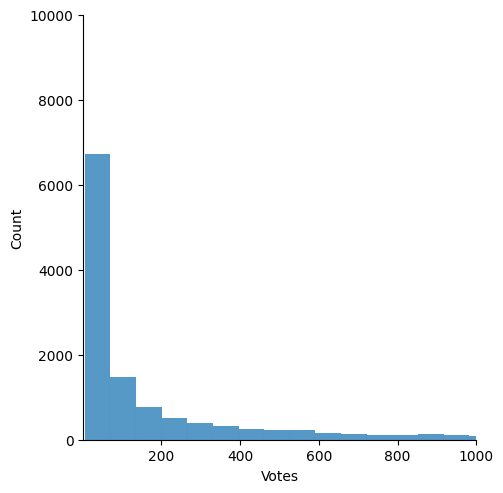

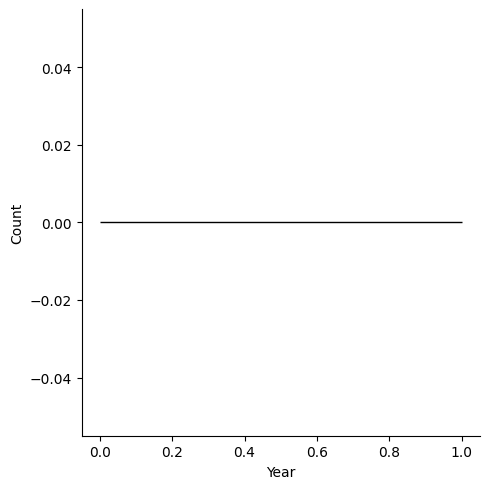

In [78]:
sns.displot(df['Votes'])
plt.xlim(1, 1000)
plt.ylim(0, 10000)
plt.show()
sns.displot(df['Year'])

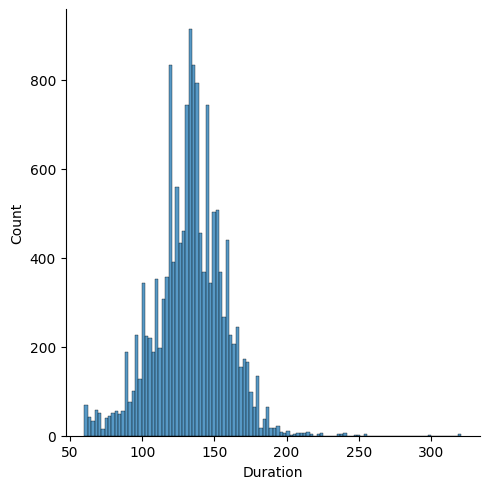

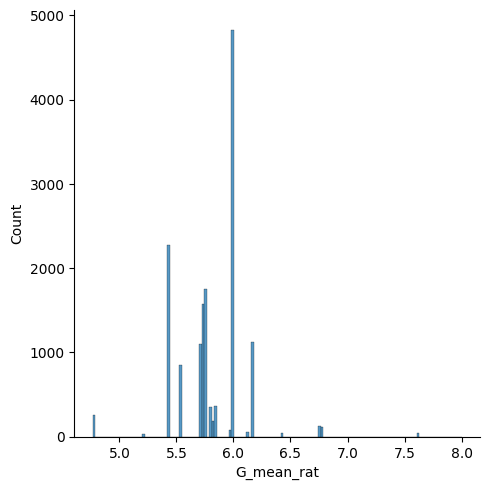

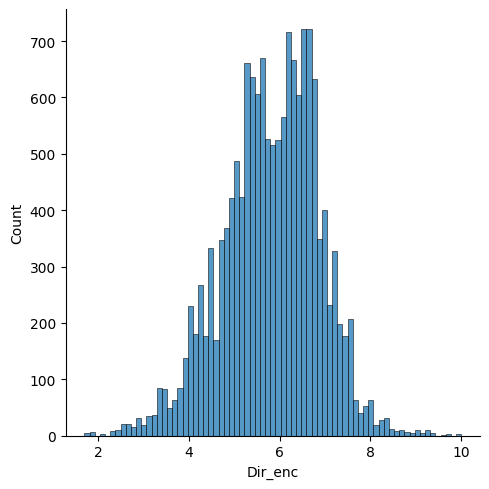

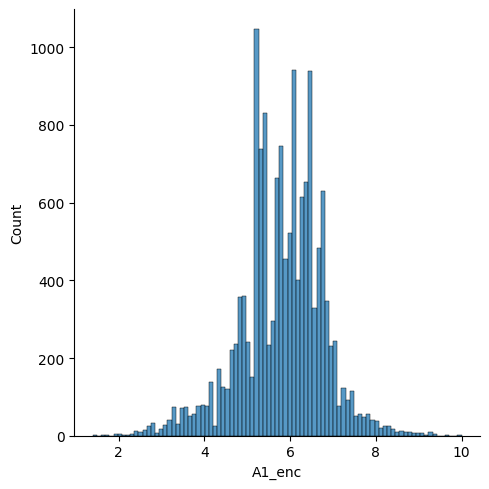

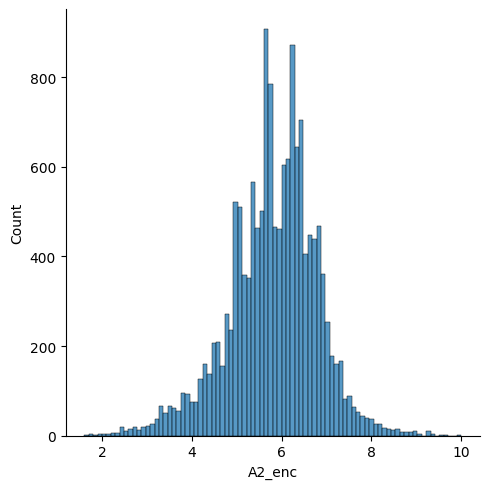

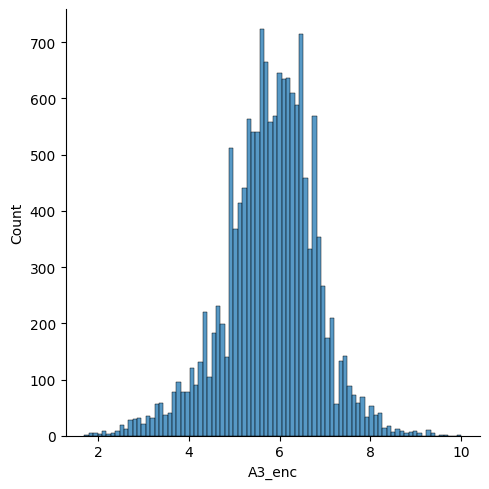

In [80]:
xol=[ 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']
for x in xol:
    sns.displot(df[x])

In [81]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df[['Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']])
std_df=pd.DataFrame(columns=[ 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc'],data=x_scaled)
minmax=MinMaxScaler()
x_minmax=minmax.fit_transform(df[['Year','Votes']])
minmax_df = pd.DataFrame(data=x_minmax, columns=['Year', 'Votes'])
scaled_df = pd.concat([std_df, minmax_df], axis=1)
scaled_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning:

All-NaN slice encountered



Duration  G_mean_rat   Dir_enc    A1_enc    A2_enc    A3_enc  Year  \
0 -0.979904    0.606774  1.132175  1.071735  1.206370  1.190245   NaN   
1 -0.939138   -0.243744 -1.330990 -0.569089 -1.418214 -1.339500   NaN   
2 -0.939138   -0.185270 -1.330990 -0.569089 -1.418214 -1.339500   NaN   
3  0.569187   -0.243744 -0.427344 -1.037117 -0.075639  0.103740   NaN   
4  0.569187    0.606774 -0.427344 -1.037117 -0.075639  0.103740   NaN   

      Votes  
0  0.000005  
1  0.000051  
2  0.000051  
3  0.001390  
4  0.001390

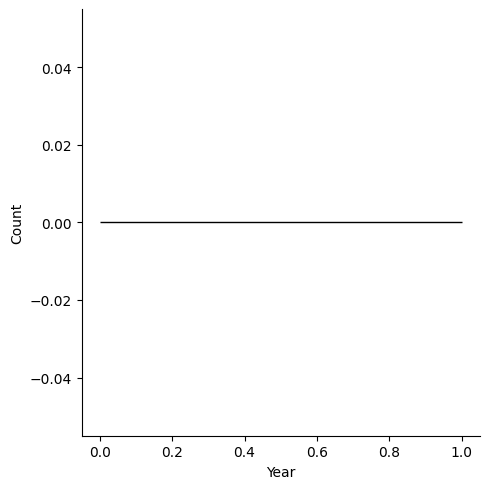

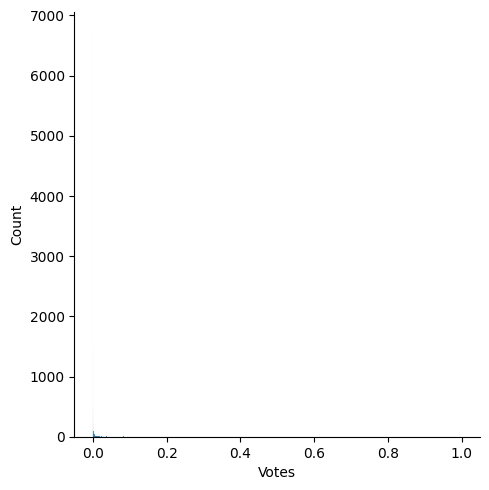

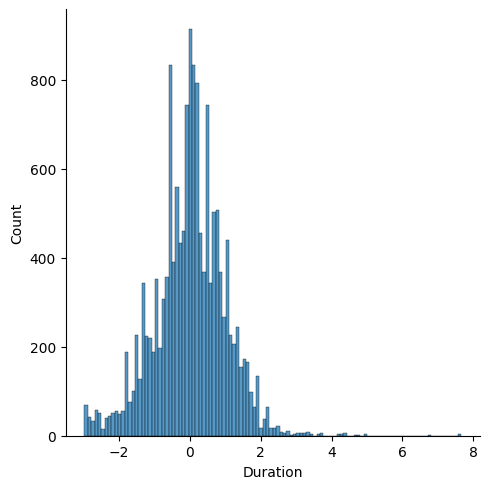

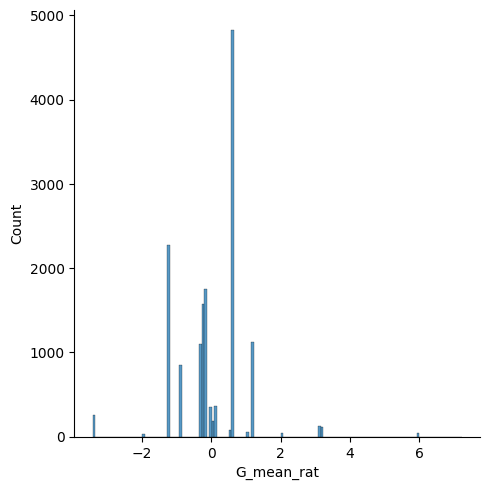

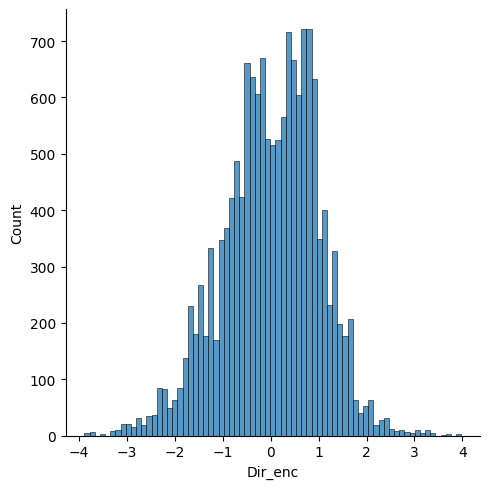

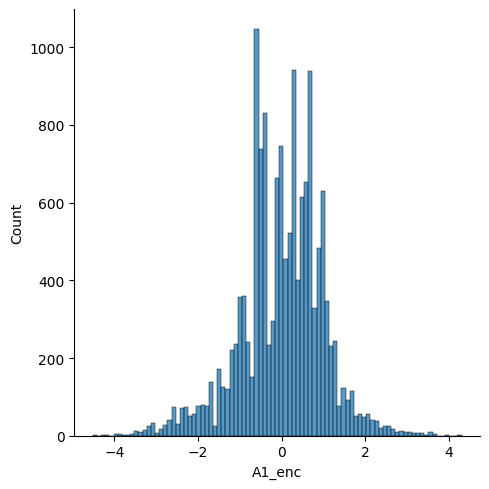

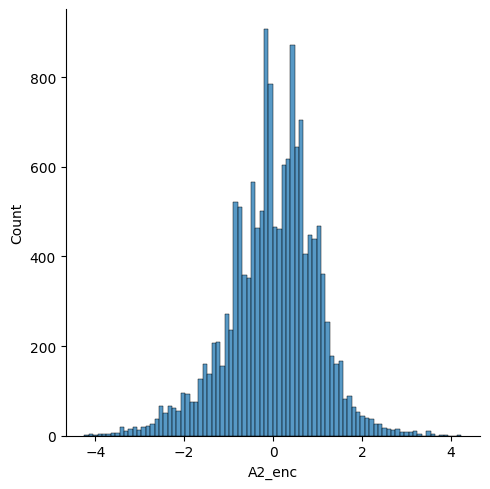

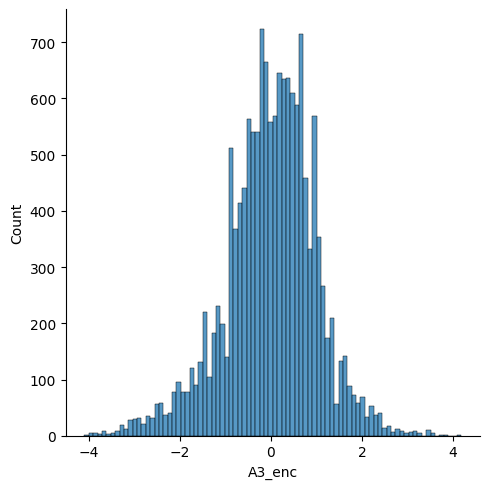

In [82]:
xol=['Year','Votes', 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']
for x in xol:
    sns.displot(scaled_df[x])

In [83]:
X = df[['Year', 'Votes', 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']]
y=df['Rating']

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.info()

(13636, 8)
(13636,)
(1516, 8)
(1516,)
<class 'pandas.core.frame.DataFrame'>
Index: 13636 entries, 3262 to 7275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        0 non-null      float64
 1   Votes       13636 non-null  int64  
 2   Duration    13636 non-null  int64  
 3   G_mean_rat  13636 non-null  float64
 4   Dir_enc     13636 non-null  float64
 5   A1_enc      13636 non-null  float64
 6   A2_enc      13636 non-null  float64
 7   A3_enc      13636 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 958.8 KB


In [87]:
# Impute missing values using SimpleImputer
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Assuming 'df' is your original DataFrame with potential missing values
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your desired strategy
X_imputed = imputer.fit_transform(X)

# Now split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=2)

# Proceed with model training
dt_regressor = DecisionTreeRegressor(random_state=2)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

In [89]:
# Impute missing values using SimpleImputer
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Assuming 'df' is your original DataFrame with potential missing values
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your desired strategy
X_imputed = imputer.fit_transform(X)

# Now split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=2)

# Proceed with model training
dt_regressor = DecisionTreeRegressor(random_state=2)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

print('The performance evaluation of Decision Tree Regressor is below: ', '\n')
print('Mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score: ', metrics.r2_score(y_test, y_pred))

# Use the imputed data (X_imputed) for cross-validation
cv_scores_dt = cross_val_score(dt_regressor, X_imputed, y, cv=8, scoring='r2')  # Change X to X_imputed
print('\nDecision Tree Regressor 5-fold cross-validation R2 scores:', cv_scores_dt)
print('Mean R2 score:', cv_scores_dt.mean())

The performance evaluation of Decision Tree Regressor is below:  

Mean squared error:  0.13240105540897099
Mean absolute error:  0.10474934036939328
R2 score:  0.9249169583215004

Decision Tree Regressor 5-fold cross-validation R2 scores: [0.53011408 0.48293579 0.53841406 0.52842333 0.56965991 0.57167857
 0.5537164  0.551574  ]
Mean R2 score: 0.5408145192327666


In [90]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [92]:
cv_scores_rf = cross_val_score(rf, X_imputed, y, cv=8, scoring='r2')  # Use X_imputed (the data with imputed values)
print('\nRandom Forest Regressor 5-fold cross-validation R2 scores:', cv_scores_rf)
print('Mean R2 score:', cv_scores_rf.mean())


Random Forest Regressor 5-fold cross-validation R2 scores: [0.77266561 0.72320609 0.77708884 0.78161989 0.81154739 0.77631846
 0.72562632 0.79537852]
Mean R2 score: 0.770431389579157
